## Kaggle MNIST Competition


TODO:
- Introduction to the Kaggle competition
- Introduce the problem statement 
- Mention tools and libraries used and import
- Import and Visualize the dataset
- Data Cleaning and Munging
- Data Preprocessing
- Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
digits_path = r'C:/Users/BOTS/Desktop/MachineLearning/SupervisedLearning/Classification/'

digits_train = digits_path + 'train.csv'

digits_csv = pd.read_csv(digits_train)

train_df = pd.DataFrame(digits_csv)

## Visualize the dataset

In [3]:
# Display the first 3 entries in the train dataset
train_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

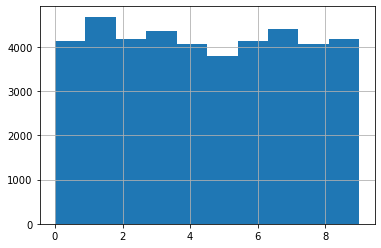

In [4]:
train_df['label'].hist()
# From visualizing the dataset it is observed that the data is evenly distributed thought the digit 1 has more occurance
# relating to other digits.


In [5]:
# Split data into train and validation set
# you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the train set
# instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen



split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2)

for train_index, val_index in split.split(train_df, train_df['label']):
    
    split_train = train_df.iloc[train_index]
    split_val = train_df.iloc[val_index]
    
    
    
print(f'Distribution of digit_cat on train set : \n {split_train.label.value_counts()/len(split_train)}')

print()

print(f'Distribution of digit_cat on test set : \n {split_val.label.value_counts()/len(split_val)}')


Distribution of digit_cat on train set : 
 1    0.111518
7    0.104792
3    0.103601
9    0.099702
2    0.099464
6    0.098482
0    0.098393
4    0.096964
8    0.096726
5    0.090357
Name: label, dtype: float64

Distribution of digit_cat on test set : 
 1    0.111548
7    0.104762
3    0.103571
9    0.099762
2    0.099405
6    0.098571
0    0.098333
4    0.096905
8    0.096786
5    0.090357
Name: label, dtype: float64


In [6]:
# Verify the distribution  
print(f"The shape of training set is {split_train.shape}")
print(f"While the shape of validation set is {split_val.shape}")

The shape of training set is (33600, 785)
While the shape of validation set is (8400, 785)


In [7]:
split_val.shape

(8400, 785)

In [8]:
# Split the training data to features and label
train_copy = split_train.copy()

X_train = train_copy.drop(columns='label')

y_train = train_copy.label

In [9]:
#There are 33,600 images, and each image has 784 features in the training dataset. This is because each image
#is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). 
#Let’s take a peek at one digit from the dataset."""

Image label : 1


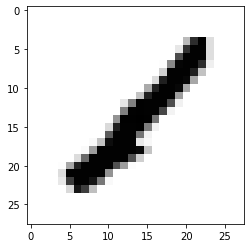

In [10]:
some_data = X_train.iloc[0, ::]

some_data = np.array(some_data)
some_digits = some_data.reshape(28,28)

some_label = y_train.iloc[0]
some_label

print(f'Image label : {some_label}')
plt.imshow(some_digits, cmap = plt.cm.binary, interpolation="nearest")

# This image looks like a 1 and indeed it is the value 1

## Data Preprocessing

In [11]:
def dataframe_to_array(df):
    
    df = np.array(df)
    
    return df


X_train_array = dataframe_to_array(X_train)
y_train_array = dataframe_to_array(y_train)

In [12]:
scale_pipe = Pipeline([('std_scaler', StandardScaler()),])

# Copy the data set and transform it using the generated pipeline
# The pixel range are from 0 to 255. Scaling this value would yield better performance to the model

scaled_x_train = scale_pipe.fit_transform(X_train_array)


In [13]:
# Ensure the data are successfully scaled
scaled_x_train[0].max()

8.567629346830202

## Prediction

In [14]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(scaled_x_train, y_train_array)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [15]:
bag_clf.oob_score_

0.8442559523809524